In [23]:
import cv2
import numpy as np
 
img = cv2.imread('coin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [24]:
# 去除噪音
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
 
sure_bg = cv2.dilate(opening, kernel, iterations=2)  
sure_fg = cv2.erode(opening, kernel, iterations=2)  
unknown = cv2.subtract(sure_bg, sure_fg) 
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
cv2.normalize(dist_transform, dist_transform, 0, 1.0, cv2.NORM_MINMAX)
# 确定的前景区域
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
# 不确定的区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
 
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers_copy = markers.copy()
markers_copy[markers==0] = 150  # 灰色表示背景
markers_copy[markers==1] = 0    # 黑色表示背景
markers_copy[markers>1] = 255   # 白色表示前景
markers_copy = np.uint8(markers_copy)

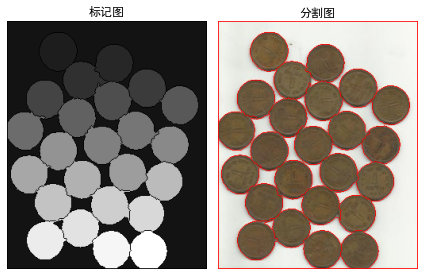

In [25]:
# 使用分水岭算法执行基于标记的图像分割，将图像中的对象与背景分离
markers = cv2.watershed(img, markers)
img[markers==-1] = [0,0,255]  # 将边界标记为红色
result=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 8))
plt.subplot(121), plt.imshow(markers, 'gray'),plt.title('标记图'), plt.axis('off')
plt.subplot(122), plt.imshow(result,'gray'), plt.title('分割图'), plt.axis('off')
plt.tight_layout()
plt.show()